In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# Load your dataset
crop = pd.read_csv('/content/Crop_recommendation.csv')
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
crop.duplicated().sum()


np.int64(0)

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


#Encoding

In [ ]:
# Complete crop dictionary
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

# Encoding with handling for missing values
crop['crop_num'] = crop['label'].map(crop_dict)


In [ ]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [ ]:
# Drop rows with NaN in 'crop_num' (introduced by missing keys in crop_dict)
crop.dropna(subset=['crop_num'], inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


#Train_Test_Split

In [ ]:
# Train-test split
X = crop.drop(['crop_num', 'label'], axis=1) # Drop both 'crop_num' and 'label'
y = crop['crop_num']

In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y

,crop_num
0,1
1,1
2,1
3,1
4,1
...,...
2195,22
2196,22
2197,22
2198,22


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


#Scale the Features using MinMaxScalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [ ]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

#Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

In [ ]:
# Model training
lr = LogisticRegression()
lr.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

svc = SVC()
svc.fit(X_train, y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier()

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = svc.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

In [ ]:
print("Acc Logistic Regression:",accuracy_score(y_test,y_pred1))
print("Acc KNN",accuracy_score(y_test,y_pred2))
print("Acc Decision Tree",accuracy_score(y_test,y_pred4))
print("Acc Random Forest",accuracy_score(y_test,y_pred5))
print("Acc SVC",accuracy_score(y_test,y_pred3))
print("Acc Gradient Boosting",accuracy_score(y_test,y_pred6))

Acc Logistic Regression: 0.9181818181818182
Acc KNN 0.9704545454545455
Acc Decision Tree 0.9818181818181818
Acc Random Forest 0.9931818181818182
Acc SVC 0.9681818181818181
Acc Gradient Boosting 0.9818181818181818


In [ ]:
final_data=pd.DataFrame({'Models':['LR','KNN','SVC','DT','RM','GBC'],
              'ACC':[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100,
                     accuracy_score(y_test,y_pred4)*100,
                     accuracy_score(y_test,y_pred5)*100,
                     accuracy_score(y_test,y_pred6)*100,]})
final_data

,Models,ACC
0,LR,91.818182
1,KNN,97.045455
2,SVC,96.818182
3,DT,98.181818
4,RM,99.318182
5,GBC,98.181818


<ipython-input-350-a6ce12beadfb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='ACC', data=final_data, palette=colors)


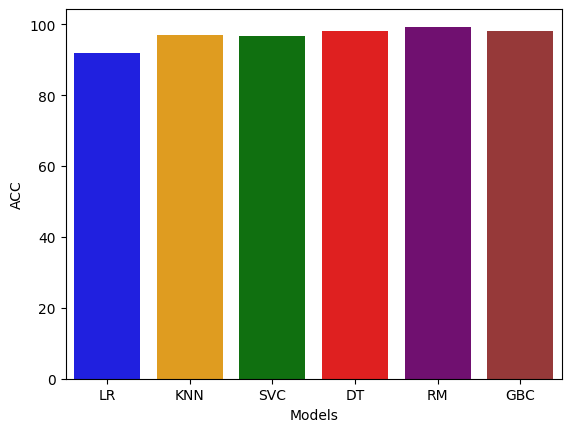

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your 'Models' column has 3 unique values
colors = ['blue', 'orange', 'green', 'red','purple','brown']  # Example colors

sns.barplot(x='Models', y='ACC', data=final_data, palette=colors)
plt.show()

In [ ]:
# finally selected randomforest model

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

#Predictive System

In [ ]:
# Prediction function
def recommendation(N, P, k, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, k, temperature, humidity, ph, rainfall]])
    transformed_features = ms.transform(features)
    prediction = rfc.predict(transformed_features)
    return prediction[0]



In [ ]:
# Example usage
N = 28
P = 57
k = 17
temperature = 30.47758
humidity = 61.58245
ph = 9.416003
rainfall = 61.86634

predicted_crop_num = recommendation(N, P, k, temperature, humidity, ph, rainfall)

# Map prediction to crop name
crop_dict_reverse = {v: k for k, v in crop_dict.items()}
predicted_crop_name = crop_dict_reverse.get(predicted_crop_num, "Unknown")

print(f"Recommended crop: {predicted_crop_name}")

Recommended crop: mothbeans


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
